# TP 3.2 : Modélisation, Modèle linéaire et ANOVA

## 1. Régression linéaire simple

Pour ce premier exercice, nous manipulerons le jeu de données `cars`.

In [73]:
help(cars)

cars                 package:datasets                  R Documentation

_S_p_e_e_d _a_n_d _S_t_o_p_p_i_n_g _D_i_s_t_a_n_c_e_s _o_f _C_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data give the speed of cars and the distances taken to stop.
     Note that the data were recorded in the 1920s.

_U_s_a_g_e:

     cars
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 2 variables.

       [,1]  speed  numeric  Speed (mph)            
       [,2]  dist   numeric  Stopping distance (ft) 
      
_S_o_u_r_c_e:

     Ezekiel, M. (1930) _Methods of Correlation Analysis_.  Wiley.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  Wiley.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1)
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     title(main = "cars data"

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>À partir des formules rappelées en cours, calculer l'équation de la droite de régression de <code>cars&dollar;dist</code> en fonction de <code>cars&dollar;speed</code>.</li>
        <li>Retrouver ce résultat directement grâce à la fonction <code>lm()</code>.</li>
        <li>Calculer la part de variance expliquée par le modèle en fonction du rapport de la variance des résidus sur la variance initiale. Cette quantité s'appelle <i>coefficient de détermination linéaire de Pearson</i> ou plus simplement $R^2$.</li>
        <li>Représenter graphiquement le nuage de points des données traversé par la droite de régression.<br>
            <center><img src="img/regression_simple.png"></center>
        </li>
    </ol>
</div>

$x_{i}$ : observation $i$ de la vitesse

$y_{i}$ : observation $i$ de la distance de freinage

Loss for scalar setting : $\mathcal{L}=\sum_{i} (y_{i}-\hat{y_{i}})^2 = \sum_{i} (y_{i}-\theta_{0} - \theta_{1}x_{i})^2$

Vanishing gradient of $\mathcal{L}$ :

Normal equation :

In [74]:
# QUESTION 1

N <- nrow(cars)
A <- matrix(data = c(N, sum(cars$speed), sum(cars$speed), sum(cars$speed^2)), nrow = 2, ncol = 2)
B <- matrix(data = c(sum(cars$dist), sum(cars$dist*cars$speed)),nrow = 2, ncol = 1)
theta <- solve(A,B)
theta0 <- theta[1]
theta1 <- theta[2]
cat("theta0 :", theta0, "\n")
cat("theta1 :", theta1)

theta0 : -17.57909 
theta1 : 3.932409

In [75]:
# QUESTION 2
model_cars <- lm(dist ~ speed, data=cars)
model_cars


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


Coefficient de détermination linéaire de Pearson R²
$$R^2 = 1 - \frac{\sum_{i} (y_{i}-\hat{y_{i}})^2}{\sum_{i} (y_{i}-\bar{y})^2}

In [76]:
# QUESTION 3
y_hat <- theta0 + cars$speed*theta1
r2 <- 1- sum((cars$dist-y_hat)^2)/sum((cars$dist-mean(cars$dist))^2)
r2

[1] 0.6510794

In [77]:
summary(model_cars)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


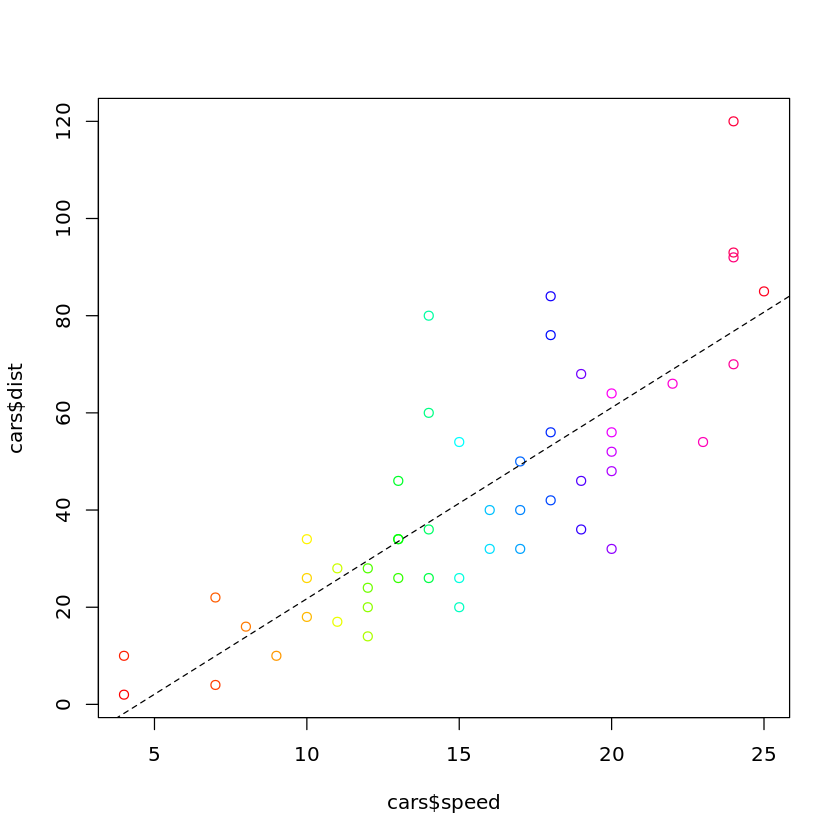

In [99]:
# QUESTION 4
plot(x = cars$speed, y=cars$dist, col=rainbow(N), )
abline(model_cars, lty = 2)

## 2. Régression linéaire multiple

Le cadre général du modèle de régression linéaire peut être donné par un vecteur $y \in \mathbb{R}^n$ contenant les $n$ observations de la *variable à expliquer* et par une matrice $X \in \mathbb{R}^{n \times p}$ contenant les $n$ observations des $p$ *variables explicatives*. Parmi les variables explicatives, une colonne de 1 est souvent ajoutée pour traiter l'ordonnée à l'origine comme les autres variables et unifier les notations. La relation recherchée se formule à l'aide du *vecteur des coefficients* $\theta \in \mathbb{R}^p$,
\begin{equation*}
y = X\theta + \varepsilon
\end{equation*}
où $\varepsilon \in \mathbb{R}^n$ est le vecteur des résidus. Des calculs similaires à ceux vus en cours pour le critère des moindres carrés donnent la formulation matricielle de l'estimateur $\hat{\theta}$ lorsque la matrice $X^\top X$ est inversible,
\begin{equation*}
\hat{\theta} = (X^\top X)^{-1} X^\top y.
\end{equation*}

Nous considérons maintenant le jeu de données `swiss`.

In [79]:
help(swiss)

swiss                 package:datasets                 R Documentation

_S_w_i_s_s _F_e_r_t_i_l_i_t_y _a_n_d _S_o_c_i_o_e_c_o_n_o_m_i_c _I_n_d_i_c_a_t_o_r_s (_1_8_8_8) _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Standardized fertility measure and socioeconomic indicators for
     each of 47 French-speaking provinces of Switzerland at about 1888.

_U_s_a_g_e:

     swiss
     
_F_o_r_m_a_t:

     A data frame with 47 observations on 6 variables, _each_ of which
     is in percent, i.e., in [0, 100].

       [,1]  ‘Fertility’         Ig,                                             
                                 ‘common standardized fertility measure’         
       [,2]  ‘Agriculture’       % of males involved in agriculture              
                                 as occupation                                   
       [,3]  ‘Examination’       % draftees receiving highest mark               
                   

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer la régression linéaire multiple modélisant la fertilité en fonction des autres variables à l'aide de la fonction <code>lm()</code>.</li>
        <li>Recalculer les coefficients de la régression par la formule matricielle donnée ci-dessus.</li>
        <li>Utiliser la fonction <code>step()</code> pour réduire la dimension du modèle en retirant les variables négligeables.</li>
    </ol>
</div>

In [83]:
# QUESTION 1
model_swiss <- lm(formula = Fertility ~ Agriculture + Examination + Education + Catholic + Infant.Mortality, data = swiss)
model_swiss


Call:
lm(formula = Fertility ~ Agriculture + Examination + Education + 
    Catholic + Infant.Mortality, data = swiss)

Coefficients:
     (Intercept)       Agriculture       Examination         Education  
         66.9152           -0.1721           -0.2580           -0.8709  
        Catholic  Infant.Mortality  
          0.1041            1.0770  


In [112]:
# QUESTION 2
X <- matrix(data = c(rep(1, nrow(swiss)),swiss$Agriculture, swiss$Examination, swiss$Education, swiss$Catholic, swiss$Infant.Mortality), nrow = nrow(swiss), ncol = ncol(swiss))
y <- matrix(data = swiss$Fertility, nrow = nrow(swiss), ncol=1)
theta_swiss <- solve(t(X) %*% X) %*% t(X) %*% y
theta_swiss

66.9151817
-0.1721140
-0.2580082
-0.8709401
0.1041153
1.0770481


In [114]:
# QUESTION 3
step(model_swiss)

Start:  AIC=190.69
Fertility ~ Agriculture + Examination + Education + Catholic + 
    Infant.Mortality

                   Df Sum of Sq    RSS    AIC
- Examination       1     53.03 2158.1 189.86
<none>                          2105.0 190.69
- Agriculture       1    307.72 2412.8 195.10
- Infant.Mortality  1    408.75 2513.8 197.03
- Catholic          1    447.71 2552.8 197.75
- Education         1   1162.56 3267.6 209.36

Step:  AIC=189.86
Fertility ~ Agriculture + Education + Catholic + Infant.Mortality

                   Df Sum of Sq    RSS    AIC
<none>                          2158.1 189.86
- Agriculture       1    264.18 2422.2 193.29
- Infant.Mortality  1    409.81 2567.9 196.03
- Catholic          1    956.57 3114.6 205.10
- Education         1   2249.97 4408.0 221.43



Call:
lm(formula = Fertility ~ Agriculture + Education + Catholic + 
    Infant.Mortality, data = swiss)

Coefficients:
     (Intercept)       Agriculture         Education          Catholic  
         62.1013           -0.1546           -0.9803            0.1247  
Infant.Mortality  
          1.0784  


## 3. Analyse de variance

Dans cette dernière partie, nous utiliserons le jeu de données `iris`.

In [81]:
help(iris)

iris                 package:datasets                  R Documentation

_E_d_g_a_r _A_n_d_e_r_s_o_n'_s _I_r_i_s _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     This famous (Fisher's or Anderson's) iris data set gives the
     measurements in centimeters of the variables sepal length and
     width and petal length and width, respectively, for 50 flowers
     from each of 3 species of iris.  The species are _Iris setosa_,
     _versicolor_, and _virginica_.

_U_s_a_g_e:

     iris
     iris3
     
_F_o_r_m_a_t:

     ‘iris’ is a data frame with 150 cases (rows) and 5 variables
     (columns) named ‘Sepal.Length’, ‘Sepal.Width’, ‘Petal.Length’,
     ‘Petal.Width’, and ‘Species’.

     ‘iris3’ gives the same data arranged as a 3-dimensional array of
     size 50 by 4 by 3, as once provided by S-PLUS.  The first
     dimension gives the case number within the species subsample, the
     second the measurements with names ‘Sepal L.’, ‘Sepal W.’, ‘Petal
  

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter les boxplots de chacune des 4 variables en fonction des modalités de la variable <code>Species</code>.<br>
            <center><img src="img/iris.png"></center>
        </li>
        <li>On souhaite appliquer une ANOVA sur chacun des variable quantitative de ce jeux de donnée. Que cherche-t-on à tester ? </li>
        <li>Le bon fonctionnement de l'ANOVA repose sur des hypothèses, quelles sont t'elle ? Mettez en place un tester pour vérifier si elles semble raisonnable sur ce jeux de données. </li>
        <li>Pour chaque variable quantitative du jeu de données <code>iris</code>, utiliser la fonction <code>aov()</code> puis <code>print()</code> et <code>summary()</code> sur le résultat pour appliquer l'ANOVA.</li>
    </ol>
</div>

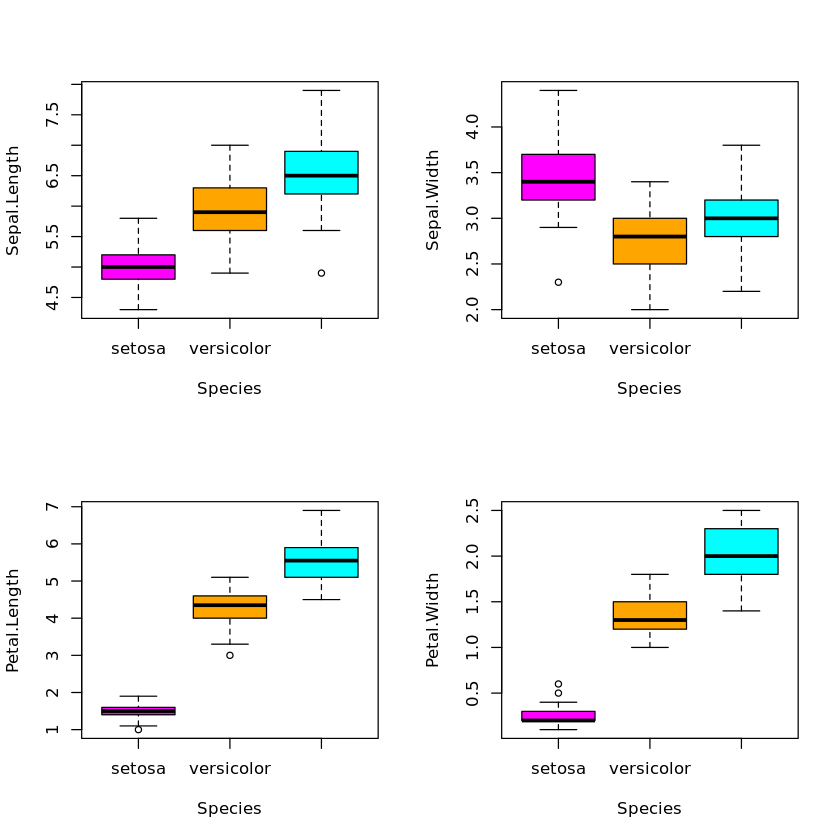

In [135]:
# QUESTION 1
par(mfrow = c(2,2))

boxplot(Sepal.Length ~ Species, data = iris, col=c('magenta','orange','cyan'))
boxplot(Sepal.Width ~ Species, data = iris, col=c('magenta','orange','cyan'))
boxplot(Petal.Length ~ Species, data = iris, col=c('magenta','orange','cyan'))
boxplot(Petal.Width ~ Species, data = iris, col=c('magenta','orange','cyan'))


In [137]:
# QUESTION 2
cat("On veut tester si les 3 espèces d'iris ont les mêmes moyennes pour chaque variable quantitative")

On veut tester si les 3 espèces d'iris ont les mêmes moyennes pour chaque variable quantitative

In [139]:
# QUESTION 3
cat("Une ANOVA requiert l'indépendance entre les variables aléatoires et que ces variables aléatoires soient suivent des lois normales de même variance")

Une ANOVA requiert l'indépendance entre les variables aléatoires et que ces variables aléatoires soient suivent des lois normales de même variance

In [149]:
# QUESTION 4
cat("ANOVA Sepal.Length\n")
aov_sepal_length = aov(Sepal.Length ~Species, iris)
print(aov_sepal_length)
summary(aov_sepal_length)

cat("ANOVA Sepal.Width\n")
aov_sepal_width = aov(Sepal.Width ~Species, iris)
print(aov_sepal_width)
summary(aov_sepal_width)

cat("ANOVA Petal.Length\n")
aov_petal_length = aov(Petal.Length ~Species, iris)
print(aov_petal_length)
summary(aov_petal_length)

cat("ANOVA Petal.Width\n")
aov_petal_width = aov(Petal.Width ~Species, iris)
print(aov_petal_width)
summary(aov_petal_width)

ANOVA Sepal.Length


Call:
   aov(formula = Sepal.Length ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  63.21213  38.95620
Deg. of Freedom        2       147

Residual standard error: 0.5147894
Estimated effects may be unbalanced


             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  63.21  31.606   119.3 <2e-16 ***
Residuals   147  38.96   0.265                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA Sepal.Width
Call:
   aov(formula = Sepal.Width ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  11.34493  16.96200
Deg. of Freedom        2       147

Residual standard error: 0.3396877
Estimated effects may be unbalanced


             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA Petal.Length
Call:
   aov(formula = Petal.Length ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  437.1028   27.2226
Deg. of Freedom        2       147

Residual standard error: 0.4303345
Estimated effects may be unbalanced


             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  437.1  218.55    1180 <2e-16 ***
Residuals   147   27.2    0.19                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA Petal.Width
Call:
   aov(formula = Petal.Width ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  80.41333   6.15660
Deg. of Freedom        2       147

Residual standard error: 0.20465
Estimated effects may be unbalanced


             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  80.41   40.21     960 <2e-16 ***
Residuals   147   6.16    0.04                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1